# **Week 2: Numerical Data Summaries**

```
.------------------------------------.
|   __  ____  ______  _  ___ _____   |
|  |  \/  \ \/ / __ )/ |/ _ \___  |  |
|  | |\/| |\  /|  _ \| | | | | / /   |
|  | |  | |/  \| |_) | | |_| |/ /    |
|  |_|  |_/_/\_\____/|_|\___//_/     |
'------------------------------------'

```


This week, we will explore basic summary statistics for numerical data and demonstrate how to compute them in R. If you are not familiar with R programming, please take some time to review [Week 0](https://colab.research.google.com/github/edelweiss611428/MXB107-Notebooks/blob/main/notebooks/Week_0.ipynb) and [Week 1](https://colab.research.google.com/github/edelweiss611428/MXB107-Notebooks/blob/main/notebooks/Week_1.ipynb) content.

## **Pre-Configurating the Notebook**

### **Switching to the R Kernel on Colab**

By default, Google Colab uses Python as its programming language. To use R instead, you’ll need to manually switch the kernel by going to **Runtime > Change runtime type**, and selecting R as the kernel. This allows you to run R code in the Colab environment.

However, our notebook is already configured to use R by default. Unless something goes wrong, you shouldn’t need to manually change runtime type.

### **Importing Required Datasets and Packages**
**Run the following lines of code**:

In [ ]:
#Do not modify

setwd("/content")

# Remove `MXB107-Notebooks` if exists,
if (dir.exists("MXB107-Notebooks")) {
  system("rm -rf MXB107-Notebooks")
}

# Fork the repository
system("git clone https://github.com/edelweiss611428/MXB107-Notebooks.git")

# Change working directory to "MXB107-Notebooks"
setwd("MXB107-Notebooks")

#
invisible(source("R/preConfigurated.R"))

Loading required package: ggplot2

Loading required package: dplyr


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: tidyr

Loading required package: stringr

Loading required package: magrittr


Attaching package: ‘magrittr’


The following object is masked from ‘package:tidyr’:

    extract


Loading required package: IRdisplay



**Do not modify the following**

In [ ]:
if (!require("testthat")) install.packages("testthat"); library("testthat")

test_that("Test if all packages have been loaded", {

  expect_true(all(c("ggplot2", "tidyr", "dplyr", "stringr", "magrittr", "IRdisplay") %in% loadedNamespaces()))

})

test_that("Test if all utility functions have been loaded", {
  expect_true(exists("skewness"))
  expect_true(exists("kurtosis"))
  expect_true(exists("Mode"))
  expect_true(exists("FDbinning"))
  expect_true(exists("ModeBinMidpoint"))
})

Loading required package: testthat


Attaching package: ‘testthat’


The following objects are masked from ‘package:magrittr’:

    equals, is_less_than, not


The following object is masked from ‘package:tidyr’:

    matches


The following object is masked from ‘package:dplyr’:

    matches




Test passed 🎉
Test passed 🎊


## **Classification of Data**


This is a diagram of data types.

In [ ]:
svgCode = paste(readLines("figures/classif_of_data.svg", warn = F), collapse = "\n")
display_html(svgCode)

<path d="M73.98185324367088,276.5L137.98922034608407,149.51500958610907Q142.28125,141 151.81681011997318,141L168.4609375,141" id="L_A_C_0" class="edge-thickness-normal edge-pattern-solid edge-thickness-normal edge-pattern-solid flowchart-link" style="stroke-dasharray: 0 0 167.06260681152344 9; stroke-dashoffset: 0;;" data-edge="true" data-et="edge" data-id="L_A_C_0" data-points="W3sieCI6NzMuOTgxODUzMjQzNjcwODgsInkiOjI3Ni41fSx7IngiOjE0Mi4yODEyNSwieSI6MTQxfSx7IngiOjE3Mi40NjA5Mzc1LCJ5IjoxNDF9XQ==" marker-end="url(#export-svg_flowchart-v2-pointEnd-margin)"/><path d="M73.98185324367088,321.5L137.98922034608407,448.48499041389096Q142.28125,457 151.81681011997318,457L163.28125,457" id="L_A_B_0" class="edge-thickness-normal edge-pattern-solid edge-thickness-normal edge-pattern-solid flowchart-link" style="stroke-dasharray: 0 0 161.88291931152344 9; stroke-dashoffset: 0;;" data-edge="true" data-et="edge" data-id="L_A_B_0" data-points="W3sieCI6NzMuOTgxODUzMjQzNjcwODgsInkiOjMyMS41fSx7IngiOjE0Mi4yODEyNSwieSI6NDU3fSx7IngiOjE2Ny4yODEyNSwieSI6NDU3fV0=" marker-end="url(#export-svg_flowchart-v2-pointEnd-margin)"/><path d="M246.14008109177215,118.5L296.4437170904412,69.33885500932236Q303.953125,62 314.453125,62L324.953125,62" id="L_C_G_0" class="edge-thickness-normal edge-pattern-solid edge-thickness-normal edge-pattern-solid flowchart-link" style="stroke-dasharray: 0 0 91.80984497070312 9; stroke-dashoffset: 0;;" data-edge="true" data-et="edge" data-id="L_C_G_0" data-points="W3sieCI6MjQ2LjE0MDA4MTA5MTc3MjE1LCJ5IjoxMTguNX0seyJ4IjozMDMuOTUzMTI1LCJ5Ijo2Mn0seyJ4IjozMjguOTUzMTI1LCJ5Ijo2Mn1d" marker-end="url(#export-svg_flowchart-v2-pointEnd-margin)"/><path d="M246.14008109177215,163.5L296.4437170904412,212.66114499067763Q303.953125,220 314.453125,220L324.953125,220" id="L_C_F_0" class="edge-thickness-normal edge-pattern-solid edge-thickness-normal edge-pattern-solid flowchart-link" style="stroke-dasharray: 0 0 91.80984497070312 9; stroke-dashoffset: 0;;" data-edge="true" data-et="edge" data-id="L_C_F_0" data-points="W3sieCI6MjQ2LjE0MDA4MTA5MTc3MjE1LCJ5IjoxNjMuNX0seyJ4IjozMDMuOTUzMTI1LCJ5IjoyMjB9LHsieCI6MzI4Ljk1MzEyNSwieSI6MjIwfV0=" marker-end="url(#export-svg_flowchart-v2-pointEnd-margin)"/><path d="M246.14008109177215,434.5L296.4437170904412,385.33885500932234Q303.953125,378 314.453125,378L324.953125,378" id="L_B_E_0" class="edge-thickness-normal edge-pattern-solid edge-thickness-normal edge-pattern-solid flowchart-link" style="stroke-dasharray: 0 0 91.8098373413086 9; stroke-dashoffset: 0;;" data-edge="true" data-et="edge" data-id="L_B_E_0" data-points="W3sieCI6MjQ2LjE0MDA4MTA5MTc3MjE1LCJ5Ijo0MzQuNX0seyJ4IjozMDMuOTUzMTI1LCJ5IjozNzh9LHsieCI6MzI4Ljk1MzEyNSwieSI6Mzc4fV0=" marker-end="url(#export-svg_flowchart-v2-pointEnd-margin)"/><path d="M246.14008109177215,479.5L296.4437170904412,528.6611449906776Q303.953125,536 314.453125,536L324.953125,536" id="L_B_D_0" class="edge-thickness-normal edge-pattern-solid edge-thickness-normal edge-pattern-solid flowchart-link" style="stroke-dasharray: 0 0 91.80985260009766 9; stroke-dashoffset: 0;;" data-edge="true" data-et="edge" data-id="L_B_D_0" data-points="W3sieCI6MjQ2LjE0MDA4MTA5MTc3MjE1LCJ5Ijo0NzkuNX0seyJ4IjozMDMuOTUzMTI1LCJ5Ijo1MzZ9LHsieCI6MzI4Ljk1MzEyNSwieSI6NTM2fV0=" marker-end="url(#export-svg_flowchart-v2-pointEnd-margin)"/> Data Types Numerical Categorical Continuous Examples: Weight, height, room temperature, time Discrete Examples: Number of children, dice rolls Ordinal Examples: Education level, satisfaction rating (1-5) Nominal Examples: Gender, color, country, suburb

As you go lower in the diagram, the data types become more specific but also a bit more limited — they carry less detailed information and support fewer types of analysis, and you can do fewer kinds of analysis on them.

We’ll focus exclusively on numerical data in this unit. It is by far the most common type encountered in data analysis tasks. Categorical data will be briefly touched on in later workshops.

## **Statistical Inference**

This diagram illustrates the fundamental process in statistics:

- We first start with a population, which is the entire set of items, individuals, or events we want to study. (e.g., all QUT students).

- Since it is often impractical or impossible to collect data on the entire population, we only draw a random sample from the population. (e.g., randomly select 100 QUT students).

- We then analyse the sample data and make statistical inferences (conclusions) about the larger population (e.g., average GPA).

This process is the core of statistical inference — using limited data to learn about a much larger group. If we did have access to the whole population, statistical inference would be unnecessary because we would already know all the information.

In [ ]:
svgCode = paste(readLines("figures/inference.svg", warn = F), collapse = "\n")
display_html(svgCode)

<path d="M181.7,74L113,136.45454545454547Q108,141 113,145.54545454545453L178.74023970641622,205.30930882401475" id="L_Population_Sample_0" class="edge-thickness-normal edge-pattern-solid edge-thickness-normal edge-pattern-solid flowchart-link" style="stroke-dasharray: 0 0 183.37522888183594 9; stroke-dashoffset: 0;;" data-edge="true" data-et="edge" data-id="L_Population_Sample_0" data-points="W3sieCI6MTgxLjcsInkiOjc0fSx7IngiOjEwOCwieSI6MTQxfSx7IngiOjE4MS43LCJ5IjoyMDh9XQ==" marker-end="url(#export-svg_flowchart-v2-pointEnd-margin)"/><path d="M254.3,208L323,145.54545454545453Q328,141 323,136.45454545454547L257.2597602935838,76.69069117598525" id="L_Sample_Population_0" class="edge-thickness-normal edge-pattern-solid edge-thickness-normal edge-pattern-solid flowchart-link" style="stroke-dasharray: 0 0 183.375244140625 9; stroke-dashoffset: 0;;" data-edge="true" data-et="edge" data-id="L_Sample_Population_0" data-points="W3sieCI6MjU0LjMsInkiOjIwOH0seyJ4IjozMjgsInkiOjE0MX0seyJ4IjoyNTQuMywieSI6NzR9XQ==" marker-end="url(#export-svg_flowchart-v2-pointEnd-margin)"/> Draw a sample from the population (collect GPAs from students) Use sample GPAs to estimate average GPA of all students (infer population mean) Population: QUT students (≈52,000 students) Sample: 100 randomly selected students

Having introduced the basic concepts of statistical inference, we now focus on the most fundamental tools  — **summary statistics**. These statistics describe important features of the sample data and provide essential information for drawing inferences about the population.including:

- What is the central or typical value of the data? *(e.g., What is the average GPA of QUT students?)*
- How much variability or dispersion exists within the data? *(e.g., How widely do GPAs vary among QUT students?)*
- Are there any data points that deviate markedly from the rest? *(e.g., Are there students with unusually low or high GPAs compared to their peers?)*

## **The Three Main Summary Statistics of Numerical Data**

### **Measures of Central Tendency**

#### **Dataset**

We will load a simulated dataset with 4 variables, each having 100 observations (with/without outliers). The non-outlier observations are generated from a standard Gaussian distribution. However, the magnitude of the outlying values increases across the variables. Here, the outliers are positive.

In [ ]:
X = read.csv("./datasets/centraltendency")

First, we will use boxplots to visualise the data and get an overview of its distribution and potential outliers. We will return later to explain in detail what the various components of a boxplot represent.

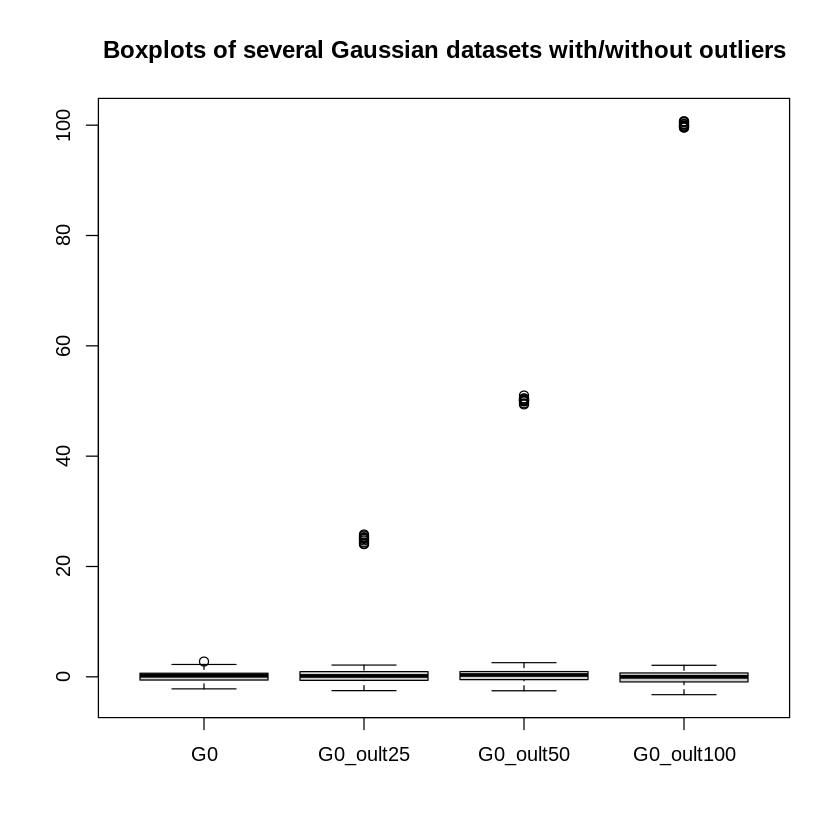

In [ ]:
boxplot(X, main = "Boxplots of several Gaussian datasets with/without outliers")

The majority of the data in each variable lie around 0. However, we observe that the magnitude of the outliers increases across variables, from approximately 25 to 100. We expect a *good* measure of central tendency to reflect the typical values accurately even in the presence of these outliers.

#### **Arithmetic Mean**

**Definition:**  
The arithmetic mean is the sum of all data values divided by the number of values. It represents the "average" value of a dataset and is a common measure of central tendency.

$$
\bar{x} = \frac{1}{n} \sum_{i=1}^n x_i,
$$
where $\{x_i\}_{i=1}^n$ denotes the sample of $n$ observations.

**Properties:**  
- In the absence of outliers, the arithmetic mean is an efficient and unbiased estimator of the population mean; its accuracy improves as the sample size increases.
- Unfortunately, the arithmetic mean is sensitive to outliers and extreme values — these can substantially affect its value.
- It is most appropriate for numeric data without significant skewness or extreme outliers.

What is skewness? We will talk about it later.

In R, the arithmetic mean can be calculated using the built-in `mean()` function. This function takes a numeric vector as input and returns the average of its elements.

In [ ]:
mean(X$G0)
mean(X$G0_oult25)
mean(X$G0_oult50)
mean(X$G0_oult100)

[1] 0.1133176

[1] 2.497787

[1] 5.108938

[1] 9.80451

We can also use the `colMeans()` function to compute means all columns in the data frame `X`.

In [ ]:
colMeans(X)

G0  G0_oult25  G0_oult50 G0_oult100 
 0.1133176  2.4977871  5.1089378  9.8045099

We observe that the arithmetic mean increases as the magnitude of the outliers increases. This behavior is undesirable when measuring central tendency, as it reflects a lack of robustness. Ideally, we seek a measure that is less affected by extreme values.

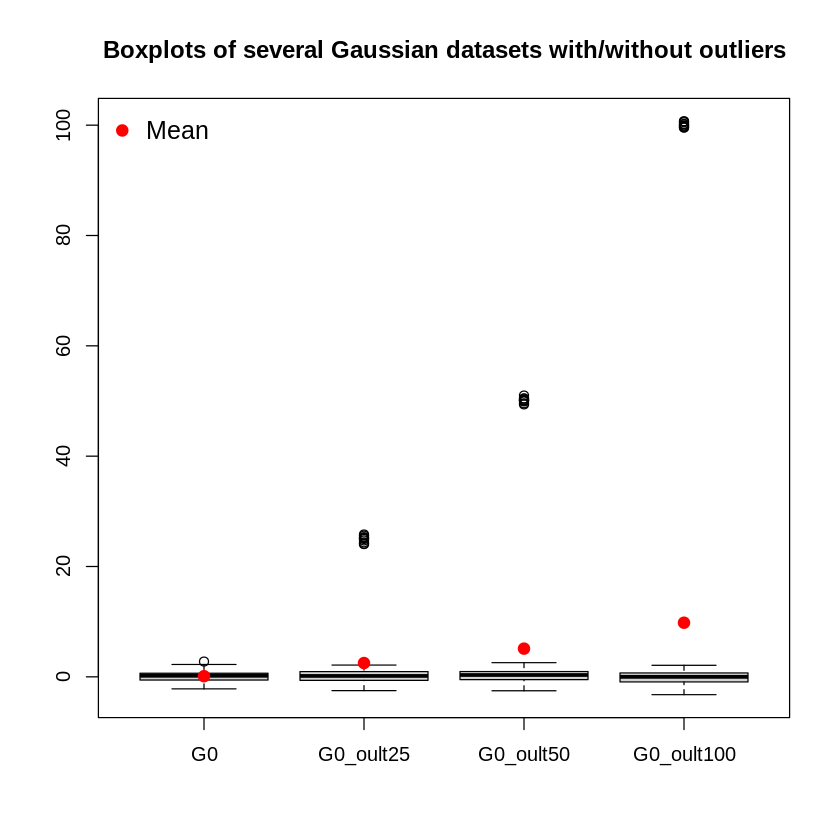

In [ ]:
boxplot(X, main = "Boxplots of several Gaussian datasets with/without outliers")

cMeans = colMeans(X)
points(1:4, cMeans, pch = 19, col = "red", cex = 1.25)
# Add legend
legend("topleft", legend = c("Mean"),
       cex = c(1.25), col = c("red"), bty = "n",
       pch = c(19))

#### **Median**

**Definition:**  
The **median** is the middle value of an ordered dataset. It divides the data into two equal halves — 50% of the observations lie below the median, and 50% lie above.

- For a dataset of size \( n \), sorted in ascending order:
  - If \( n \) is **odd**, the median is the value at position \( (n + 1)/2 \).
  - If \( n \) is **even**, the median is the average of the two middle values at positions \( n/2 \) and \( n/2 + 1 \).

$$
\text{Median}(x_1, \dots, x_n) =
\begin{cases}
x_{(n+1)/2}, & \text{if } n \text{ is odd}, \\\\
\frac{1}{2} \left(x_{n/2} + x_{n/2 + 1} \right), & \text{if } n \text{ is even},
\end{cases}
$$

where $x_{(1)}, x_{(2)}, \dots, x_{(n)}$ denotes the sorted sample.

**Properties:**
- The median is **robust to outliers** — extreme values have little to no effect on it.
- It is a more **reliable measure of central tendency** than the mean for skewed distributions or data with outliers.
- Suitable for both **ordinal** and **continuous** data.

To compute the median in R, use the `median()` function. It takes a numeric vector and returns the sample median.


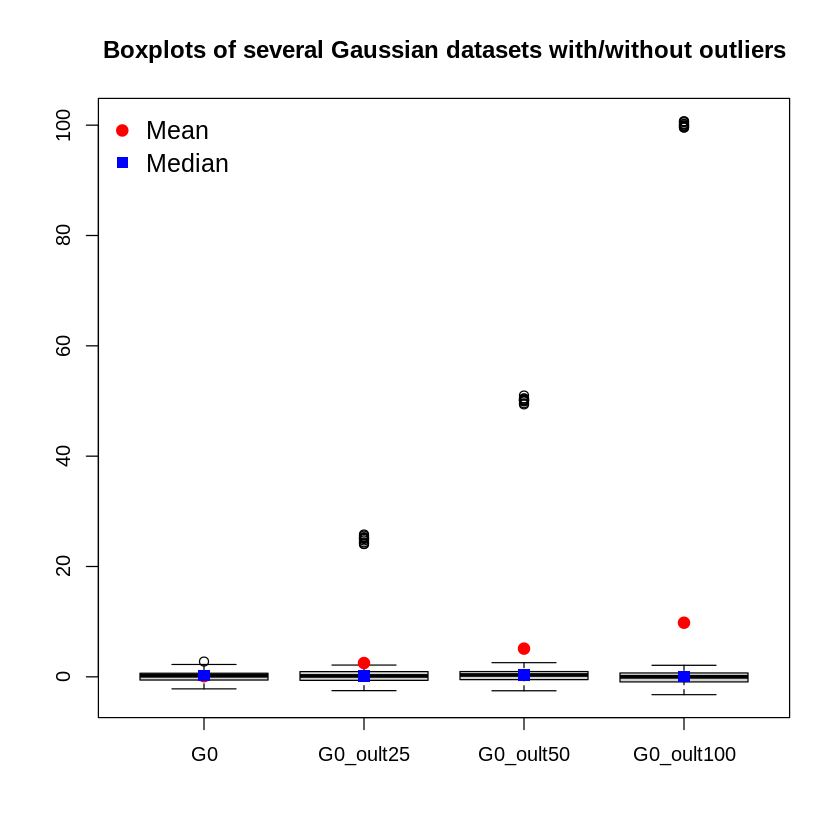

In [ ]:
boxplot(X, main = "Boxplots of several Gaussian datasets with/without outliers")

cMeans = colMeans(X)
cMedians = apply(X, 2, median)

points(1:4, cMeans, pch = 19, col = "red", cex = 1.25)
points(1:4, cMedians, pch = 15, col = "blue", cex = 1.25)

# Add legend
legend("topleft", legend = c("Mean", "Median"),
       cex = rep(1.25, 2), col = c("red", "blue"), bty = "n",
       pch = c(19,15))